In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 28 21:54:28 2020

@author: Dave
"""

while 1:
    menu = "What would you like to do? \n 1. Enter your ID number \n 2. Exit \n Enter an option."
    
    x = int(input(menu))
    
    if x == 1:
        
        from bs4 import BeautifulSoup, SoupStrainer
        import requests

        parkrun_id = float(input("Enter the numerical part of your parkrun id (excluding the A prefix) "))

        #if parkrun_id >= 0 and isinstance(parkrun_id, int) is True:

        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 5.1; rv:7.0.1) Gecko/20100101 Firefox/7.0.1'}
        prefix = 'https://www.parkrun.org.uk/'
        # Commented out below so not run by mistake (n.b. 403 error)
        webpage_response = requests.get('https://www.parkrun.org.uk/results/athleteresultshistory/?athleteNumber=' + str(parkrun_id), headers = headers)

        webpage = webpage_response.content
        #parse_only = SoupStrainer("a",{'class': 'review_link'})
        soup = BeautifulSoup(webpage, "html.parser", parse_only=SoupStrainer('a'))
        #print(soup)

        links = []

        # This will scrape the page based on the individual's parkrun id entered above
        search_str = 'athletehistory?athleteNumber=' + str(parkrun_id)
        break

    elif x == 2:
        print("Good bye")
        break
        
    else:
        print("Not a valid input. Try again.")

#476321 Andrew
#2952795 Colin
#3378270 Adrian

What would you like to do? 
 1. Enter your ID number 
 2. Exit 
 Enter an option.1
Enter the numerical part of your parkrun id (excluding the A prefix) 2952795


In [2]:
import re
import pandas as pd

# Adds all link from soup onto links list
for link in soup: 
    if link.has_attr('href'):
        links.append(link['href'])
#print(links)

# Filters out links other than relevant event link string using search_str
event_links = []
for a in links:
    
    if search_str in a:
        event_links.append(a)
        #print(link['href'])
print(event_links)   

['https://www.parkrun.org.uk/bracknell/results/athletehistory?athleteNumber=2952795.0', 'https://www.parkrun.org.uk/bedfont/results/athletehistory?athleteNumber=2952795.0', 'https://www.parkrun.org.uk/homewood/results/athletehistory?athleteNumber=2952795.0', 'https://www.parkrun.org.uk/cirencester/results/athletehistory?athleteNumber=2952795.0', 'https://www.parkrun.org.uk/aberdeen/results/athletehistory?athleteNumber=2952795.0', 'https://www.parkrun.org.uk/californiacountry/results/athletehistory?athleteNumber=2952795.0', 'https://www.parkrun.org.uk/fellfoot/results/athletehistory?athleteNumber=2952795.0', 'https://www.parkrun.org.uk/worcester/results/athletehistory?athleteNumber=2952795.0', 'https://www.parkrun.org.uk/kirkwall/results/athletehistory?athleteNumber=2952795.0', 'https://www.parkrun.org.uk/frimleylodge/results/athletehistory?athleteNumber=2952795.0']


In [3]:
soup_name = BeautifulSoup(webpage, "html.parser", parse_only=SoupStrainer('h2'))
print(soup_name)

for i in soup_name:
    runner_name = i.get_text(',')

print(runner_name)

<h2>Colin DOW (30 parkruns)
        </h2>
Colin DOW (30 parkruns)
        


In [4]:
from itertools import repeat
import matplotlib.pyplot as plt
import numpy as np

#follow each link:
run_data = []
event_list = []

for course in event_links: 

    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 5.1; rv:7.0.1) Gecko/20100101 Firefox/7.0.1'}
    webpage_new = requests.get(course, headers = headers)
    new_soup = BeautifulSoup(webpage_new.content, "html.parser") #, parse_only=SoupStrainer('table')
    #pretty_soup = new_soup.prettify()
    #print(pretty_soup)
    running = new_soup.find_all('td')

    for r in running[16:]:     # Don't need first 16 items from each page
            run_data.append(r.get_text(','))
#            results_text = r.get_text(',')
    #print(results_text)

    #print(results[1:2])

#    split_text = results_text.split(',')
    
    soup_h3 = new_soup.find_all('h3')

    for j in soup_h3:
        venue_string = j.get_text(',')
        venue_name = venue_string.split(' parkrun')[0]
    
    soup_h2 = new_soup.find_all('h2')     
    
    for k in soup_h2:
        run_string = k.get_text(',')
        venue_count =  run_string.split(' ')[3]
    
    #convert venue_count to integer format:
        venue_count = int(venue_count)
        
        #add venue_name venue_count times to the list
        event_list.extend(repeat(venue_name, venue_count))

print(run_data)
#print(df.head())

['2018', '00:22:46', '60.83%', '2019', '00:22:38', '61.71%', '31/08/2019', '234', '30', '23:24', '59.69%', '\n                                \xa0\n                                ', '10/08/2019', '231', '24', '23:29', '59.47%', '\n                                \xa0\n                                ', '06/07/2019', '226', '18', '22:40', '61.62%', '\n                                \xa0\n                                ', '29/06/2019', '225', '21', '22:41', '61.57%', '\n                                \xa0\n                                ', '22/06/2019', '224', '19', '22:38', '61.71%', '\n                                    PB\n                                \n                                \xa0\n                                ', '25/05/2019', '220', '44', '23:47', '58.72%', '\n                                \xa0\n                                ', '18/05/2019', '219', '28', '23:04', '60.55%', '\n                                \xa0\n                                ', '11/05/2019

In [5]:
# To count how many of each course in the df and to produce graph
course_count = dict()
for i in event_list:
  course_count[i] = course_count.get(i, 0) + 1
print(course_count)

{'Bracknell': 13, 'Bedfont Lakes': 7, 'Homewood': 3, 'Cirencester': 1, 'Aberdeen': 1, 'California Country': 1, 'Fell Foot': 1, 'Worcester': 1, 'Kirkwall': 1, 'Frimley Lodge': 1}


In [6]:
#convert dictionary to dataframe to join/merge with other df later
df_course = pd.Series(course_count, name = 'Course Count')
df_course = df_course.to_frame(name = 'Course DF')
df_course.reset_index(inplace=True)
df_course.columns = ['Event Name', 'Number of Runs']
print(df_course)

           Event Name  Number of Runs
0           Bracknell              13
1       Bedfont Lakes               7
2            Homewood               3
3         Cirencester               1
4            Aberdeen               1
5  California Country               1
6           Fell Foot               1
7           Worcester               1
8            Kirkwall               1
9       Frimley Lodge               1


In [7]:
years_tuple = ('2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020')

run_data_clean = []
new_list = []
        
for idx, val in enumerate(run_data):
    if val in years_tuple:
        print(idx, val)
        run_data_clean.append(idx)
        run_data_clean.append(idx + 1)
        run_data_clean.append(idx + 2)
        
print(run_data_clean)

for idx, val in enumerate(run_data):
    if idx in run_data_clean:
        print(idx)
    else:
        new_list.append(val)

print(new_list)


0 2018
3 2019
84 2018
129 2017
132 2018
135 2019
156 2019
165 2016
174 2020
183 2018
192 2018
201 2019
210 2017
[0, 1, 2, 3, 4, 5, 84, 85, 86, 129, 130, 131, 132, 133, 134, 135, 136, 137, 156, 157, 158, 165, 166, 167, 174, 175, 176, 183, 184, 185, 192, 193, 194, 201, 202, 203, 210, 211, 212]
0
1
2
3
4
5
84
85
86
129
130
131
132
133
134
135
136
137
156
157
158
165
166
167
174
175
176
183
184
185
192
193
194
201
202
203
210
211
212
['31/08/2019', '234', '30', '23:24', '59.69%', '\n                                \xa0\n                                ', '10/08/2019', '231', '24', '23:29', '59.47%', '\n                                \xa0\n                                ', '06/07/2019', '226', '18', '22:40', '61.62%', '\n                                \xa0\n                                ', '29/06/2019', '225', '21', '22:41', '61.57%', '\n                                \xa0\n                                ', '22/06/2019', '224', '19', '22:38', '61.71%', '\n                            

In [8]:
import datetime, time

column_names = ['Run Date', 'Run Number', 'Position', 'Time', 'Age Grade', 'PB?'] # , 'Event Name'

df = pd.DataFrame(np.array(new_list).reshape(-1, 6), columns = list(column_names))

soup_name = BeautifulSoup(webpage, "html.parser", parse_only=SoupStrainer('h2'))
#convert list into dataframe column
df.loc[:,'Event Name'] = event_list
print(df.head(30))

      Run Date Run Number Position   Time Age Grade  \
0   31/08/2019        234       30  23:24    59.69%   
1   10/08/2019        231       24  23:29    59.47%   
2   06/07/2019        226       18  22:40    61.62%   
3   29/06/2019        225       21  22:41    61.57%   
4   22/06/2019        224       19  22:38    61.71%   
5   25/05/2019        220       44  23:47    58.72%   
6   18/05/2019        219       28  23:04    60.55%   
7   11/05/2019        218       37  24:12    57.71%   
8   26/01/2019        204       30  23:38    58.60%   
9   19/01/2019        203       25  23:55    57.91%   
10  29/09/2018        186       27  24:26    56.68%   
11  08/09/2018        183       19  22:46    60.83%   
12  01/09/2018        182       30  23:36    58.69%   
13  19/05/2018        459       15  21:03    65.80%   
14  12/05/2018        458       25  21:43    63.78%   
15  05/05/2018        457       20  21:43    63.78%   
16  17/03/2018        450       19  22:41    60.62%   
17  10/03/

In [9]:
time_list = [] # list created to store times as strings
seconds_list = [] # list created to store times in seconds to allow calculation of standard dev
time_list = df.loc[:, 'Time'].tolist()

#Convert time into seconds to enable calculation of stdev
def get_sec(time_str):
    m, s = time_str.split(':')
    return int(m) * 60 + int(s)

for i in time_list:
    seconds = get_sec(i)
    seconds_list.append(seconds)
print(seconds_list)

[1404, 1409, 1360, 1361, 1358, 1427, 1384, 1452, 1418, 1435, 1466, 1366, 1416, 1263, 1303, 1303, 1361, 1410, 1343, 1385, 1402, 1600, 1417, 1384, 1363, 1360, 1409, 1374, 1339, 1397]


In [10]:
# Mean and standard deviation calcs for times
#mean_time = df.loc[:,'Time'].mean()
df.loc[:,'Time_seconds'] = seconds_list
mean_time_s = df.loc[:,'Time_seconds'].mean()
st_dev = round(np.std(seconds_list), 2)

# Max and min values for times
max_value = df.loc[:,'Time'].max()
min_value = df.loc[:,'Time'].min()
#print('Mean time = ', mean_time)
print('Mean time in seconds = ', mean_time_s, 'seconds')
print('Standard Deviation = ', st_dev, 'seconds')
print('Max value = ', max_value)
print('Min value = ', min_value)

Mean time in seconds =  1388.9666666666667 seconds
Standard Deviation =  58.6 seconds
Max value =  26:40
Min value =  21:03


In [11]:
#convert mean time in seconds back to hours, minutes, seconds
#full hours

##### DRY - use last function as input for second last and again for first (can't get this to work so commented out)
def min_conv(time_seconds):
    converted_h = int(time_seconds / 3600)
    #remainder hours to be converted to minutes
    converted_h_rem = time_seconds % 3600
    #print(converted_h_rem)
    #full minutes
    return str(int(converted_h_rem / 60))

def sec_conv(time_seconds):
    converted_h = int(time_seconds / 3600)
    #remainder hours to be converted to minutes
    converted_h_rem = time_seconds % 3600
    #full minutes
    converted_m = str(int(converted_h_rem / 60))
    #remainder minutes to be converted to seconds, rounded to 2dp
    return str(int(converted_h_rem % 60))

#def sec_conv(time_seconds):
#    remainder minutes to be converted to seconds, rounded to 2dp
#    converted_m = float(min_conv(time_seconds)) % 60
#    print(converted_m)
#    return str(int(converted_m))

def time_conv(time_seconds):
    converted_h = int(time_seconds / 3600)
    #remainder hours to be converted to minutes
    converted_h_rem = time_seconds % 3600
    #full minutes
    converted_m = int(converted_h_rem / 60)
    #remainder minutes to be converted to seconds, rounded to 2dp
    converted_m_rem = int(converted_h_rem % 60)
    return '0{0}:{1}:{2}'.format(converted_h, converted_m, converted_m_rem)

#print(time_conv(1250))
#print(min_conv(1250))
#print(sec_conv(1250))
 

# Summary statistics statement
Mean_Time_string = 'The mean of ' + runner_name + ' times is ' +  time_conv(mean_time_s) + ' or ' + min_conv(mean_time_s) + ' minutes and ' + sec_conv(mean_time_s) + ' seconds and the standard deviation is ' + min_conv(st_dev) + ' minutes and ' + sec_conv(st_dev) + ' seconds.'
print(Mean_Time_string)
                                                                    

The mean of Colin DOW (30 parkruns)
         times is 00:23:8 or 23 minutes and 8 seconds and the standard deviation is 0 minutes and 58 seconds.


In [12]:
full_times = []

for i in seconds_list:
    convert_time = time_conv(i)
    full_times.append(convert_time)
print(full_times)


['00:23:24', '00:23:29', '00:22:40', '00:22:41', '00:22:38', '00:23:47', '00:23:4', '00:24:12', '00:23:38', '00:23:55', '00:24:26', '00:22:46', '00:23:36', '00:21:3', '00:21:43', '00:21:43', '00:22:41', '00:23:30', '00:22:23', '00:23:5', '00:23:22', '00:26:40', '00:23:37', '00:23:4', '00:22:43', '00:22:40', '00:23:29', '00:22:54', '00:22:19', '00:23:17']


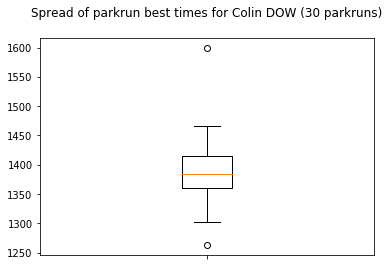

In [13]:
cx = plt.subplot()
plt.boxplot(seconds_list)
plt.title('Spread of parkrun best times for ' + runner_name)
#cx.set_xticks(range(len(seconds_list)))
#cx.set_yticklabels(range(len(seconds_list)))
cx.set_xticklabels('')
plt.show()

#sort axis labels
#remove outliers

In [14]:
import datetime, time
df.loc[:,'Time_new'] = full_times
df.loc[:,'Time_new'] = pd.to_datetime(df.loc[:,'Time_new']).dt.time

In [15]:
#convert dates to datetime format so can filter list on dates
import datetime
#datetime.datetime.strptime('Run Date', "%d%m%Y").date()
df.loc[:,'Run Date'] = pd.to_datetime(df.loc[:,'Run Date'])
#df.loc[:,'Time'] = pd.to_datetime(df.loc[:,'Time']).dt.time #doesn't work - no hour data
print(df.info())
print(df.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
Run Date        30 non-null datetime64[ns]
Run Number      30 non-null object
Position        30 non-null object
Time            30 non-null object
Age Grade       30 non-null object
PB?             30 non-null object
Event Name      30 non-null object
Time_seconds    30 non-null int64
Time_new        30 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 2.2+ KB
None
<bound method NDFrame.head of      Run Date Run Number Position   Time Age Grade  \
0  2019-08-31        234       30  23:24    59.69%   
1  2019-10-08        231       24  23:29    59.47%   
2  2019-06-07        226       18  22:40    61.62%   
3  2019-06-29        225       21  22:41    61.57%   
4  2019-06-22        224       19  22:38    61.71%   
5  2019-05-25        220       44  23:47    58.72%   
6  2019-05-18        219       28  23:04    60.55%   
7  2019-11-05        218       37  24:12

In [16]:
dates = df[(df['Run Date'] > '2016-01-01') & (df['Run Date'] < '2020-02-01') ]
print(dates)

     Run Date Run Number Position   Time Age Grade  \
0  2019-08-31        234       30  23:24    59.69%   
1  2019-10-08        231       24  23:29    59.47%   
2  2019-06-07        226       18  22:40    61.62%   
3  2019-06-29        225       21  22:41    61.57%   
4  2019-06-22        224       19  22:38    61.71%   
5  2019-05-25        220       44  23:47    58.72%   
6  2019-05-18        219       28  23:04    60.55%   
7  2019-11-05        218       37  24:12    57.71%   
8  2019-01-26        204       30  23:38    58.60%   
9  2019-01-19        203       25  23:55    57.91%   
10 2018-09-29        186       27  24:26    56.68%   
11 2018-08-09        183       19  22:46    60.83%   
12 2018-01-09        182       30  23:36    58.69%   
13 2018-05-19        459       15  21:03    65.80%   
14 2018-12-05        458       25  21:43    63.78%   
15 2018-05-05        457       20  21:43    63.78%   
16 2018-03-17        450       19  22:41    60.62%   
17 2018-10-03        449    

In [17]:
# Query to pull out all dates after a certain date and times over a certain amount 
# Specifically to allow me to filter on runs with Oliver 
time_cutoff = '24:30' # insert time you want to filter from
date_limit = '2018-06-07' # insert date you want to filter from

time_conv = get_sec(time_cutoff)

#print(time_conv)

runs_with_O = df[(df['Run Date'] > date_limit) & (df['Time_seconds'] > time_conv)]

print(runs_with_O)


Empty DataFrame
Columns: [Run Date, Run Number, Position, Time, Age Grade, PB?, Event Name, Time_seconds, Time_new]
Index: []


In [23]:
# Use pandas to create a new df showing summary data. Can then use this instead of a dictionary for creating the bar chart

#print(df.info())

#unique values in list
unique_venues = df.loc[:, 'Event Name'].unique()
#print(unique_venues)

#create empty list to append values and then convert to dataframe
df_list = []

#loop through values in unique_venues list to collect summary data
for i in unique_venues:
    df2 = df[df['Event Name'] == i]
    fastest = df2.loc[:,'Time_new'].min()
    df_fast = df2[df2['Time_new'] == fastest]
    #find the date of the fastest time
    date_fastest = df_fast.loc[:,'Run Date']
    #convert to string to allow it to be split
    date_str = str(date_fastest).split(' ')[3]
    #because the date string includes an index for some reason need to parse to only what needed
    final_str = date_str[0:10]
    rows = [pd.Series([final_str, 'Label_2', 'Label_3', fastest,'Label_5', 'Label_6', i, 'Label_8', 'Label_9'], index=df.columns)]
    for i in rows:
        df_list.append(i)
print(df_list)
#print(final_str)

[Run Date        2019-06-22
Run Number         Label_2
Position           Label_3
Time              00:22:38
Age Grade          Label_5
PB?                Label_6
Event Name       Bracknell
Time_seconds       Label_8
Time_new           Label_9
dtype: object, Run Date           2018-05-19
Run Number            Label_2
Position              Label_3
Time                 00:21:03
Age Grade             Label_5
PB?                   Label_6
Event Name      Bedfont Lakes
Time_seconds          Label_8
Time_new              Label_9
dtype: object, Run Date        2019-05-10
Run Number         Label_2
Position           Label_3
Time              00:23:22
Age Grade          Label_5
PB?                Label_6
Event Name        Homewood
Time_seconds       Label_8
Time_new           Label_9
dtype: object, Run Date         2019-04-20
Run Number          Label_2
Position            Label_3
Time               00:23:04
Age Grade           Label_5
PB?                 Label_6
Event Name      Cirencester
Ti

In [24]:
column_names2 = ['Run Date', 'Label_2', 'Label_3','Time','Label_5', 'Label_6', 'Event Name', 'Label_8', 'Label_9']
df3 = pd.DataFrame(np.array(df_list).reshape(-1, 9), columns = list(column_names2))
df3 = df3.loc[:, ['Event Name', 'Time', 'Run Date']]
#print(df3.info())
print(df3)

           Event Name      Time    Run Date
0           Bracknell  00:22:38  2019-06-22
1       Bedfont Lakes  00:21:03  2018-05-19
2            Homewood  00:23:22  2019-05-10
3         Cirencester  00:23:04  2019-04-20
4            Aberdeen  00:22:43  2016-12-31
5  California Country  00:22:40  2020-01-01
6           Fell Foot  00:23:29  2018-04-21
7           Worcester  00:22:54  2018-12-25
8            Kirkwall  00:22:19  2019-11-23
9       Frimley Lodge  00:23:17  2017-07-01


In [25]:
df_join = pd.merge(df_course, df3)

df_join.columns = ['Event Name', 'Number of Runs', 'PB Time', 'PB Date']
#df_summary = df_join[['Event Name', 'Number of Runs', 'PB Time', 'PB Date']]
print(df_join)

           Event Name  Number of Runs   PB Time     PB Date
0           Bracknell              13  00:22:38  2019-06-22
1       Bedfont Lakes               7  00:21:03  2018-05-19
2            Homewood               3  00:23:22  2019-05-10
3         Cirencester               1  00:23:04  2019-04-20
4            Aberdeen               1  00:22:43  2016-12-31
5  California Country               1  00:22:40  2020-01-01
6           Fell Foot               1  00:23:29  2018-04-21
7           Worcester               1  00:22:54  2018-12-25
8            Kirkwall               1  00:22:19  2019-11-23
9       Frimley Lodge               1  00:23:17  2017-07-01


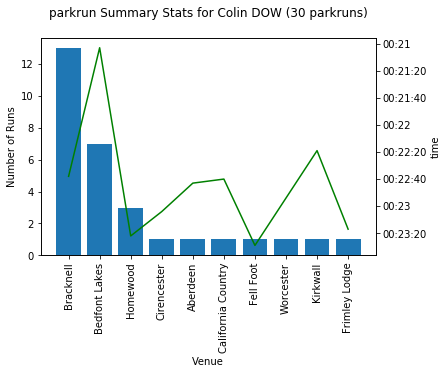

In [27]:
#plotting 1st graph
ax = plt.subplot()
plt.bar(range(len(course_count)), list(course_count.values()), align='center')
ax.set_xlabel('Venue')
ax.set_ylabel('Number of Runs')
plt.xticks(range(len(course_count)), list(course_count.keys()))
ax.set_xticklabels(df_join.loc[:,'Event Name'], rotation = 'vertical')
plt.title('parkrun Summary Stats for ' + runner_name)

#sets two sets of y-axis, followed by second plot:
bx = ax.twinx()
bx = plt.subplot
#bx.set_ylabel('Time')
plt.plot(range(len(df_join.loc[:,'PB Time'])), df_join.loc[:,'PB Time'], color = 'green')
#bx.set_yticklabels(range(len(df_join.loc[:,'PB Time'])))
#puts the y-axis the time variable upside down so quicker times are higher on the axis:
plt.gca().invert_yaxis()
plt.show()

#need to sort out y-ticks for right hand vertical axis###